In [67]:
from GraphModels.model import *
from GraphModels.solvers import *
from GraphModels.metrics import *
import networkx as nx
import matplotlib.pyplot as plt
import random
from experiments import *

from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
def f(x, a, b, c):
    return a * np.power(x, b) + c

params = curve_fit(f, np.arange(0.1, 1, 0.1), [0.94, 0.87, 0.85, 0.77, 0.74, 0.68, 0.64, 0.55, 0.4])[0]

In [69]:
N = 20
n = 40
S_exp = 100
S_obs = 100

In [70]:
data = np.stack([familywise_MHT_experiments(CholCorrModel,
                                            MHTSolver(0.05, corr_pvalues),
                                            N,
                                            f(density, *params),
                                            n,
                                            S_exp,
                                            S_obs,
                                            metrics=[TN, FN, FP, TP],
                                            verbose=True) for density in np.arange(0.1, 1, 0.1)])

Family-wise MHT experiment with 0.913 completed in time: 442.431s
Family-wise MHT experiment with 0.887 completed in time: 430.009s
Family-wise MHT experiment with 0.85 completed in time: 434.802s
Family-wise MHT experiment with 0.802 completed in time: 360.679s
Family-wise MHT experiment with 0.745 completed in time: 352.776s
Family-wise MHT experiment with 0.68 completed in time: 351.245s
Family-wise MHT experiment with 0.606 completed in time: 351.071s
Family-wise MHT experiment with 0.523 completed in time: 378.322s
Family-wise MHT experiment with 0.434 completed in time: 345.9s


In [71]:
data.shape

(9, 4, 5)

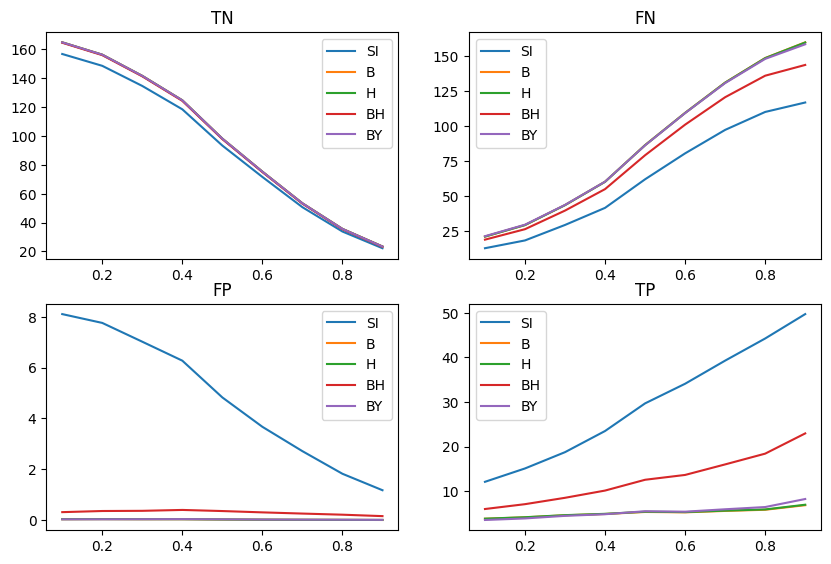

In [72]:
for i, metric in enumerate(['TN', 'FN', 'FP', 'TP']):
    plt.subplot(3, 2, i+1)
    for idx, algo in enumerate(['SI', 'B', 'H', 'BH', 'BY']):
        plt.plot(np.arange(0.1, 1, 0.1), data[:, i, idx], label=algo)
    plt.title(metric)
    plt.legend()
    
plt.gcf().set_size_inches(10, 10)

In [58]:
model = CholPCorrModel(20, 0.94)
solver = MHTSolver(0.05, corr_pvalues)

In [59]:
solver.fit(model.sample(40))

In [60]:
predg = nx.from_numpy_array(solver.apply_correction('B'))

In [61]:
tp, tn, fp, fn = model.confusion(predg)
tp, tn, fp, fn

(1, 180, 0, 9)

In [65]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
pos_accuracy = TPR(tp, tn, fp, fn)
neg_accuracy = tn / (tn + fp)

num_pos = tp + fn
num_neg = tn + fp

prop_pos = num_pos / (tp + tn + fp + fn)
prop_neg = num_neg / (tp + tn + fp + fn)

print('accuracy', accuracy)
print('pos accuracy', pos_accuracy)
print('neg accuracy', neg_accuracy)
print('num pos', num_pos)
print('num neg', num_neg)
print('prop pos', prop_pos)
print('prop neg', prop_neg)

accuracy 0.9526315789473684
pos accuracy 0.1
neg accuracy 1.0
num pos 10
num neg 180
prop pos 0.05263157894736842
prop neg 0.9473684210526315
weighted_accuracy 0.1473684210526316
